In [23]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LassoCV
from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

import numpy as np
from sklearn.impute import SimpleImputer

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error,confusion_matrix


In [24]:

df = pd.read_csv(r"./data/titanic_train.csv")


In [25]:
df.head()
# y = df['Survived']
# X = df.drop('Survived',axis=1)
X= df
copy= X.copy()


In [26]:

X=X.drop("Cabin",axis=1)
X=X.drop("Name",axis=1)
X=X.drop("PassengerId",axis=1)
X=X.drop("Ticket",axis=1)
display(X.head())
X.info()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [27]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
numeric_cols = [cols for cols in X.columns if X[cols].dtypes != 'object']
numeric_cols.remove('Survived')
X['Class'] = X['Pclass']
for cols in numeric_cols:  
    X[cols]=imp.fit_transform(X[[cols]])

X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

filter = X['Class'] == 1
Xtrain = X[filter]
Xtest = X[~filter]
display(Xtest)
display(Xtrain)
ytrain= Xtrain['Survived']
ytest = Xtest['Survived']



Xtrain = Xtrain.drop(['Class','Survived'],axis=1)
Xtest = Xtest.drop(['Class','Survived'],axis=1)
display(Xtest)
display(ytest)
# numeric_cols = [cols for cols in Xtrain.columns if Xtrain[cols].dtypes != 'object']
# numeric_cols.remove('Pclass')
# print(numeric_cols)

# for cols in numeric_cols:
#     Xtest[cols]=imp.fit_transform(Xtest[[cols]])
#     Xtrain[cols]=imp.fit_transform(Xtrain[[cols]])

# Xtrain[numeric_cols] = scaler.fit_transform(Xtrain[numeric_cols])
# Xtest[numeric_cols] = scaler.fit_transform(Xtest[numeric_cols])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Class
0,0,0.827377,male,-0.592481,0.432793,-0.473674,-0.502445,S,3
2,1,0.827377,female,-0.284663,-0.474545,-0.473674,-0.488854,S,3
4,0,0.827377,male,0.407926,-0.474545,-0.473674,-0.486337,S,3
5,0,0.827377,male,0.000000,-0.474545,-0.473674,-0.478116,Q,3
7,0,0.827377,male,-2.131568,2.247470,0.767630,-0.224083,S,3
...,...,...,...,...,...,...,...,...,...
884,0,0.827377,male,-0.361618,-0.474545,-0.473674,-0.506472,S,3
885,0,0.827377,female,0.715743,-0.474545,5.732844,-0.061999,Q,3
886,0,-0.369365,male,-0.207709,-0.474545,-0.473674,-0.386671,S,2
888,0,0.827377,female,0.000000,0.432793,2.008933,-0.176263,S,3


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Class
1,1,-1.566107,female,0.638789,0.432793,-0.473674,0.786845,C,1
3,1,-1.566107,female,0.407926,0.432793,-0.473674,0.420730,S,1
6,0,-1.566107,male,1.870059,-0.474545,-0.473674,0.395814,S,1
11,1,-1.566107,female,2.177876,-0.474545,-0.473674,-0.113846,S,1
23,1,-1.566107,male,-0.130754,-0.474545,-0.473674,0.066360,S,1
...,...,...,...,...,...,...,...,...,...
871,1,-1.566107,female,1.331378,0.432793,0.767630,0.409741,S,1
872,0,-1.566107,male,0.254017,-0.474545,-0.473674,-0.547748,S,1
879,1,-1.566107,female,2.023967,-0.474545,0.767630,1.025945,C,1
887,1,-1.566107,female,-0.823344,-0.474545,-0.473674,-0.044381,S,1


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,male,-0.592481,0.432793,-0.473674,-0.502445,S
2,0.827377,female,-0.284663,-0.474545,-0.473674,-0.488854,S
4,0.827377,male,0.407926,-0.474545,-0.473674,-0.486337,S
5,0.827377,male,0.000000,-0.474545,-0.473674,-0.478116,Q
7,0.827377,male,-2.131568,2.247470,0.767630,-0.224083,S
...,...,...,...,...,...,...,...
884,0.827377,male,-0.361618,-0.474545,-0.473674,-0.506472,S
885,0.827377,female,0.715743,-0.474545,5.732844,-0.061999,Q
886,-0.369365,male,-0.207709,-0.474545,-0.473674,-0.386671,S
888,0.827377,female,0.000000,0.432793,2.008933,-0.176263,S


0      0
2      1
4      0
5      0
7      0
      ..
884    0
885    0
886    0
888    0
890    0
Name: Survived, Length: 675, dtype: int64

In [28]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Xtrain['Embarked'] =imp.fit_transform(Xtrain[['Embarked']])
Xtest['Embarked'] =imp.fit_transform(Xtest[['Embarked']])


Sex


,male
0,1
2,0
4,1
5,1
7,1
...,...
884,1
885,0
886,1
888,0


Embarked


,Q,S
0,0,1
2,0,1
4,0,1
5,1,0
7,0,1
...,...,...
884,0,1
885,1,0
886,0,1
888,0,1


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,0,0,0
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,0,0,1
6,-1.566107,1.870059,-0.474545,-0.473674,0.395814,1,0,1
11,-1.566107,2.177876,-0.474545,-0.473674,-0.113846,0,0,1
23,-1.566107,-0.130754,-0.474545,-0.473674,0.066360,1,0,1


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,1,0,1
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,0,0,1
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,1,0,1
5,0.827377,0.000000,-0.474545,-0.473674,-0.478116,1,1,0
7,0.827377,-2.131568,2.247470,0.767630,-0.224083,1,0,1


206
(675,)
136
(216,)


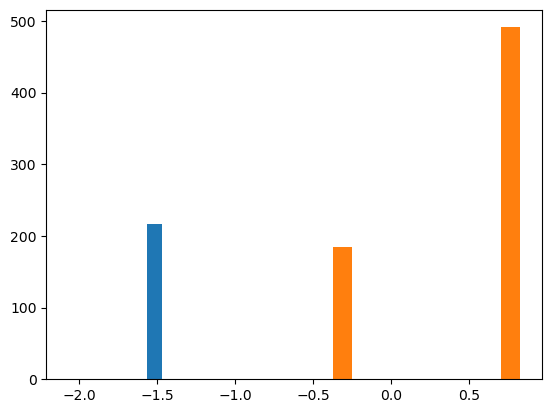

In [29]:

#
cat_cols = [cols for cols in Xtrain.columns if Xtrain[cols].dtypes == 'object']

for cols in cat_cols:
    temp = pd.get_dummies(Xtrain[cols],drop_first=True)
    Xtrain = pd.concat([Xtrain,temp],axis=1)
    Xtrain = Xtrain.drop(cols,axis=1)
    
    temp = pd.get_dummies(Xtest[cols],drop_first=True)
    Xtest = pd.concat([Xtest,temp],axis=1)
    Xtest = Xtest.drop(cols,axis=1)
    print(cols)
    display(temp)
    
display(Xtrain.head())
display(Xtest.head())

Xt = Xtrain
Xv = Xtest
yt= ytrain
yv = ytest

plt.hist(Xtrain['Pclass'])
plt.hist(Xtest['Pclass'])
print(ytest.sum())
print(ytest.shape)
print(ytrain.sum())
print(ytrain.shape)



In [30]:

newdf = pd.DataFrame()
def runLasso(Cvalue,Xt,yt,scoredict = {}):
    newdf=pd.DataFrame()
    las = LogisticRegression(penalty='l1',solver='liblinear',random_state=0,C=Cvalue)
    las.fit(Xt,yt)
    t=las.score(Xt,yt)
    s=las.score(Xv,yv)
    scoredict['Train'] = t
    scoredict['Val'] = s

    print(t)
    print(s)
    mse = mean_squared_error(yt,las.predict(Xt))
    scoredict['Mse'] =mse
    scoredict['Preds'] = las.predict(Xt)

    table =[(x,y) for x,y in zip(las.coef_,Xt.columns)]
    for i,cols in enumerate(Xt.columns):
        # print(cols)
        # print(las.coef_)
        dict = {cols:[las.coef_[0][i]]}
        newdf = pd.concat([newdf,pd.DataFrame(dict)],axis=1)
    
    newdf['Name'] = str(Cvalue) + "_Lasso"
    display(newdf.head())
    for t in table:
        print(f"{t[1]}: {t[0]}")
    return newdf
        

In [31]:
hyperparamsvalues = [0.001,0.03,0.05,10,100,1000]
dict_hp = {}
for i in hyperparamsvalues:
    dict_hp[i] = {}
newdf = pd.DataFrame()

#all the trials
# CvalueLogScores = {}
for i in hyperparamsvalues:
    # if i == 0.03:
    #     df = runLasso(i,Xt,yt,CvalueLogScores)
    # else:
    df = runLasso(i,Xt,yt,dict_hp[i])
    newdf=pd.concat([newdf,df],axis=0)
    display(newdf.head())

#regular one
RegularLogScores = {}
lr = LogisticRegression(penalty=None)
lr.fit(Xt,yt)
t=lr.score(Xt,yt)
s=lr.score(Xv,yv)

print(t)
print(s)
RegularLogScores['Train'] = t
RegularLogScores['Val'] = s
mse = mean_squared_error(yt,lr.predict(Xt))
RegularLogScores['Mse'] =mse
RegularLogScores['Preds'] = lr.predict(Xt)

table =[(x,y) for x,y in zip(lr.coef_,Xt.columns)]
tempdf=pd.DataFrame()
for i,cols in enumerate(Xt.columns):
    # print(cols)
    # print(las.coef_)
    dict = {cols:[lr.coef_[0][i]]}
    tempdf = pd.concat([tempdf,pd.DataFrame(dict)],axis=1)

tempdf['Name'] = "LogRegress"

newdf=pd.concat([newdf,tempdf],axis=0)

# df = runLasso(0.03,Xt,yt)
# newdf=pd.concat([newdf,df],axis=0)
# display(newdf.head())

# df = runLasso(0.05,Xt,yt)
# newdf=pd.concat([newdf,df],axis=0)
# display(newdf.head())

# df = runLasso(10,Xt,yt)
# newdf=pd.concat([newdf,df],axis=0)
# display(newdf.head())

# df = runLasso(100,Xt,yt)
# newdf=pd.concat([newdf,df],axis=0)
print("----------------")
display(newdf.head())


0.37037037037037035
0.6948148148148148


,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001_Lasso


Pclass: [0. 0. 0. 0. 0. 0. 0. 0.]


,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001_Lasso


0.6435185185185185
0.6681481481481482


,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name
0,0.0,0.0,0.0,0.0,0.151939,0.0,0.0,0.0,0.03_Lasso


Pclass: [0.         0.         0.         0.         0.15193887 0.
 0.         0.        ]


,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.001_Lasso
0,0.0,0.0,0.0,0.0,0.151939,0.0,0.0,0.0,0.03_Lasso


0.6712962962962963
0.7348148148148148


,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name
0,-0.129201,0.0,0.0,0.0,0.200266,-0.202409,0.0,0.0,0.05_Lasso


Pclass: [-0.12920105  0.          0.          0.          0.2002663  -0.20240867
  0.          0.        ]


,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.001_Lasso
0,0.000000,0.0,0.0,0.0,0.151939,0.000000,0.0,0.0,0.03_Lasso
0,-0.129201,0.0,0.0,0.0,0.200266,-0.202409,0.0,0.0,0.05_Lasso


0.7731481481481481
0.7748148148148148


,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name
0,-2.287854,-0.303166,0.377793,-0.243301,0.065237,-3.780387,-1.592212,-0.199208,10_Lasso


Pclass: [-2.28785427 -0.30316607  0.37779342 -0.24330135  0.06523741 -3.7803866
 -1.59221162 -0.19920794]


,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001_Lasso
0,0.000000,0.000000,0.000000,0.000000,0.151939,0.000000,0.000000,0.000000,0.03_Lasso
0,-0.129201,0.000000,0.000000,0.000000,0.200266,-0.202409,0.000000,0.000000,0.05_Lasso
0,-2.287854,-0.303166,0.377793,-0.243301,0.065237,-3.780387,-1.592212,-0.199208,10_Lasso


0.7685185185185185
0.7777777777777778


,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name
0,-1.467142,-0.3079,0.412727,-0.257303,0.062615,-3.845618,-2.062397,-0.230104,100_Lasso


Pclass: [-1.46714206 -0.30789959  0.41272745 -0.25730342  0.06261478 -3.84561842
 -2.06239731 -0.23010442]


,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001_Lasso
0,0.000000,0.000000,0.000000,0.000000,0.151939,0.000000,0.000000,0.000000,0.03_Lasso
0,-0.129201,0.000000,0.000000,0.000000,0.200266,-0.202409,0.000000,0.000000,0.05_Lasso
0,-2.287854,-0.303166,0.377793,-0.243301,0.065237,-3.780387,-1.592212,-0.199208,10_Lasso
0,-1.467142,-0.307900,0.412727,-0.257303,0.062615,-3.845618,-2.062397,-0.230104,100_Lasso


0.7685185185185185
0.7777777777777778


,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name
0,-1.466229,-0.308459,0.41626,-0.258741,0.062309,-3.85287,-2.110926,-0.233444,1000_Lasso


Pclass: [-1.46622945 -0.30845855  0.41625973 -0.25874132  0.06230945 -3.85286979
 -2.11092587 -0.23344383]


,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001_Lasso
0,0.000000,0.000000,0.000000,0.000000,0.151939,0.000000,0.000000,0.000000,0.03_Lasso
0,-0.129201,0.000000,0.000000,0.000000,0.200266,-0.202409,0.000000,0.000000,0.05_Lasso
0,-2.287854,-0.303166,0.377793,-0.243301,0.065237,-3.780387,-1.592212,-0.199208,10_Lasso
0,-1.467142,-0.307900,0.412727,-0.257303,0.062615,-3.845618,-2.062397,-0.230104,100_Lasso


0.7685185185185185
0.7733333333333333
----------------


,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001_Lasso
0,0.000000,0.000000,0.000000,0.000000,0.151939,0.000000,0.000000,0.000000,0.03_Lasso
0,-0.129201,0.000000,0.000000,0.000000,0.200266,-0.202409,0.000000,0.000000,0.05_Lasso
0,-2.287854,-0.303166,0.377793,-0.243301,0.065237,-3.780387,-1.592212,-0.199208,10_Lasso
0,-1.467142,-0.307900,0.412727,-0.257303,0.062615,-3.845618,-2.062397,-0.230104,100_Lasso


In [32]:
finaldf = newdf.copy()
finaldf.reset_index(inplace=True)
display(finaldf.head())

import plotly.express as px
import plotly.graph_objects as go

finaldf.index = finaldf["Name"]

finaldf= finaldf.drop(["Name","index"],axis=1)
cols = finaldf.columns
display(finaldf)


print(cols)

fig = go.Figure(data=[
    
    go.Bar(name=index, x=cols, y=row.map(lambda x: abs(x))) for index,row in finaldf.iterrows()]
                )
fig.update_layout(yaxis_title="Coefficient(Absolute valued)",xaxis_title="Features of Titanic Survival",title="Logistic Regression Feature Selection Using Lasso on Titanic Survival Classification",
                  legend_title="Lasso Hyperparameter Values")
fig.show()



,index,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001_Lasso
1,0,0.000000,0.000000,0.000000,0.000000,0.151939,0.000000,0.000000,0.000000,0.03_Lasso
2,0,-0.129201,0.000000,0.000000,0.000000,0.200266,-0.202409,0.000000,0.000000,0.05_Lasso
3,0,-2.287854,-0.303166,0.377793,-0.243301,0.065237,-3.780387,-1.592212,-0.199208,10_Lasso
4,0,-1.467142,-0.307900,0.412727,-0.257303,0.062615,-3.845618,-2.062397,-0.230104,100_Lasso


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Name,,,,,,,,
0.001_Lasso,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.03_Lasso,0.000000,0.000000,0.000000,0.000000,0.151939,0.000000,0.000000,0.000000
0.05_Lasso,-0.129201,0.000000,0.000000,0.000000,0.200266,-0.202409,0.000000,0.000000
10_Lasso,-2.287854,-0.303166,0.377793,-0.243301,0.065237,-3.780387,-1.592212,-0.199208
100_Lasso,-1.467142,-0.307900,0.412727,-0.257303,0.062615,-3.845618,-2.062397,-0.230104
1000_Lasso,-1.466229,-0.308459,0.416260,-0.258741,0.062309,-3.852870,-2.110926,-0.233444
LogRegress,-1.673233,-0.308542,0.416708,-0.258905,0.062217,-3.854703,-2.116991,-0.233978


Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')


In [33]:

#0.03
for keys in dict_hp:
    print(keys)
    d = dict_hp[keys]
    for keys in d:
        print(keys)
        print(d[keys])
#regular log
print("Log Regression No Penalty")
for keys in RegularLogScores:
    print(keys)
    print(RegularLogScores[keys])
    

    



0.001
Train
0.37037037037037035
Val
0.6948148148148148
Mse
0.6296296296296297
Preds
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.03
Train
0.6435185185185185
Val
0.6681481481481482
Mse
0.35648148148148145
Preds
[1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 